In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.cluster import KMeans
from sklearn.cluster import kmeans_plusplus
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits import mplot3d 
from mpl_toolkits.mplot3d import Axes3D
sb.set() # set the default Seaborn style for graphics
pd.options.mode.chained_assignment = None

In [11]:
scaler = MinMaxScaler()
miamiData = pd.read_csv("./miami_housing.csv") #import fresh data  
miamiData[["LATITUDE", "LONGITUDE", "WATER_DIST", "OCEAN_DIST", "HWY_DIST", "SALE_PRC"]] = scaler.fit_transform(miamiData[["LATITUDE", "LONGITUDE", "WATER_DIST", "OCEAN_DIST", "HWY_DIST", "SALE_PRC"]])
miamiData = miamiData[["LATITUDE", "LONGITUDE", "WATER_DIST", "OCEAN_DIST", "HWY_DIST", "SALE_PRC"]]
miamiData.head()

,LATITUDE,LONGITUDE,WATER_DIST,OCEAN_DIST,HWY_DIST,SALE_PRC
0,0.845660,0.903382,0.006897,0.166541,0.329985,0.142746
1,0.846203,0.918989,0.006702,0.137895,0.375122,0.107448
2,0.846222,0.919529,0.005895,0.136911,0.376693,0.282389
3,0.847019,0.922091,0.000000,0.131381,0.383222,0.355314
4,0.847130,0.917398,0.006480,0.140390,0.370513,0.264934


In [12]:
def kmeans(varname1, varname2, k):
    dataset = pd.read_csv("./miami_housing.csv") #import fresh data  
    dataset[[varname1, varname2]] = scaler.fit_transform(dataset[[varname1, varname2]])
    X = dataset[[varname1, varname2, 'PARCELNO']]
    init_cents = np.random.rand(k,2)
    k_means = KMeans(n_clusters=k, init=init_cents, random_state=42, n_init=1, max_iter=300) 
    start = time.time()
    X['clusters'] = k_means.fit_predict(X[[str(varname1), str(varname2)]])
    end = time.time()
    print("Total Time taken for K-means: ", end-start)
    centroid = k_means.cluster_centers_
    X = X[['PARCELNO', 'clusters']]
    dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
    
    sb.scatterplot(data=dataset, x=varname1, y=varname2, hue="clusters", palette="deep", alpha=0.5)
    sb.scatterplot(data = init_cents, x=init_cents[:, 0], y=init_cents[:,1], color = "red", marker='x', s=100)
    sb.scatterplot(data = centroid, x=centroid[:, 0], y=centroid[:,1], color = "black", marker='x', s=100)


Total Time taken for K-means:  0.17204070091247559


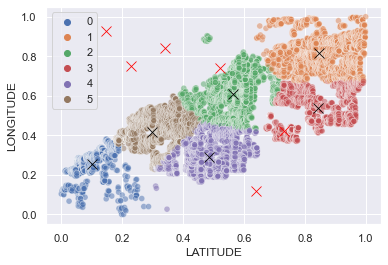

In [13]:
kmeans("LATITUDE", "LONGITUDE", 6)

In [14]:
scaler = StandardScaler()
miamiData = pd.read_csv("./miami_housing.csv") #import fresh data  
miamiData[["LATITUDE", "LONGITUDE", "WATER_DIST", "OCEAN_DIST", "HWY_DIST", "SALE_PRC"]] = scaler.fit_transform(miamiData[["LATITUDE", "LONGITUDE", "WATER_DIST", "OCEAN_DIST", "HWY_DIST", "SALE_PRC"]])
miamiData = miamiData[["LATITUDE", "LONGITUDE", "WATER_DIST", "OCEAN_DIST", "HWY_DIST", "SALE_PRC"]]
miamiData.head()

,LATITUDE,LONGITUDE,WATER_DIST,OCEAN_DIST,HWY_DIST,SALE_PRC
0,1.153532,1.871328,-0.973193,-1.073043,1.356321,0.126285
1,1.155620,1.945244,-0.974014,-1.195979,1.713909,-0.160597
2,1.155690,1.947800,-0.977425,-1.200202,1.726350,1.261204
3,1.158752,1.959935,-1.002323,-1.223937,1.778074,1.853884
4,1.159178,1.937710,-0.974953,-1.185271,1.677394,1.119339


Total Time taken for K-means:  0.06501317024230957


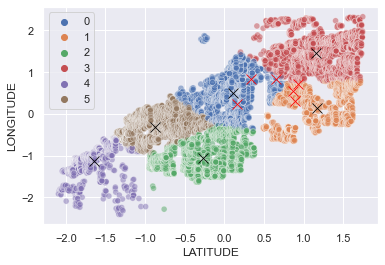

In [15]:
kmeans("LATITUDE", "LONGITUDE", 6)